In [1]:
#import ROOT
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_file_name = "si26a_5/xs010000.tot"
mass_beam = 4.001506 # a
mass_target = 25.992334 # si26

In [3]:
def to_CM_energy(array):
    factor = mass_target / (mass_beam + mass_target)
    return factor * array

def to_LAB_energy(array):
    factor = (mass_beam + mass_target) / mass_target
    return factor * array

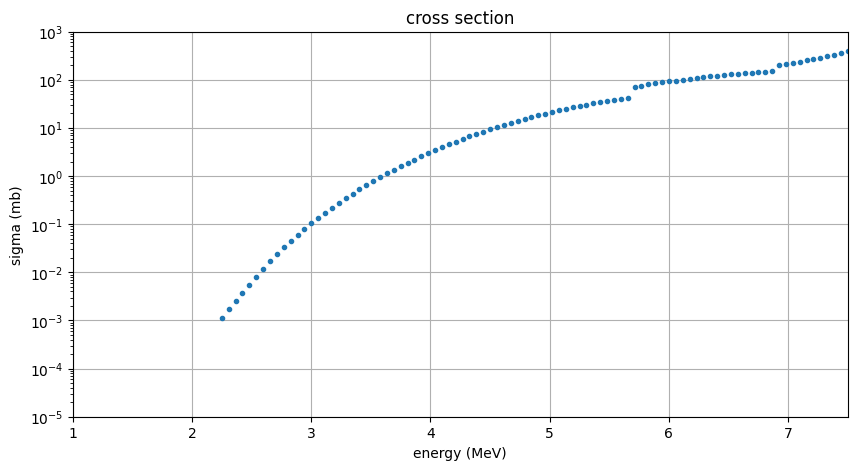

In [4]:
energies = []
cross_section = []

with open(input_file_name, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
            
        parts = line.split()
        try:
            x = float(parts[0])
            y = float(parts[1])
            energies.append(x)
            cross_section.append(y)
        except ValueError:
            continue

energies = np.array(energies)
cross_section = np.array(cross_section)
cross_section = to_CM_energy(cross_section)

plt.figure(figsize=(10, 5))
plt.plot(energies, cross_section, marker='o', markersize=3, linestyle='none')
plt.yscale("log")
plt.title('cross section')
plt.xlabel('energy (MeV)')
plt.ylabel('sigma (mb)')
plt.xlim(1.0, 7.5)
plt.ylim(1.0e-5, 1.0e+3)
plt.grid(True)
plt.show()